# IS597 Final Project: Predicting Delivery Delays in Supply Chains

### Student Name:  Cathy Yang
### Net ID:  suyuany2

## Motivation & Objective

In today's globalized market, supply chain efficiency is critical to a company's success. One of the major challenges faced by logistics managers is the unpredictability of delivery delays, which can disrupt
operations and affect customer satisfaction. If a customer could not receive the packages on time, it would undermine customers’ retention rate. Using data-driven approaches to estimate delivery delays can help
businesses mitigate risks, optimize their processes, and improve customer experiences.
The objective of this project is to build a machine learning model that can predict delivery delays based on
supply chain data. I aim to analyze the various factors contributing to delivery delays, such as shipment
mode, supplier performance, product category, and warehouse distance.  


## Data set 

The dataset used for this project is from Kaggle's "DataCo Smart Supply Chain" dataset (https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis/data), which contains
180,519 rows and 53 columns. The dataset is available in CSV format and provides information on
various supply chain factors, including shipping modes, product categories, warehouses, and performance
indicators. Each instance represents a unique delivery, and attributes such as “Days for Shipment
(Scheduled)”, “Days for Shipment (Actual)”, and “Late Delivery Risk” are critical for predicting delays.
Other important fields include customer segment, market, and order region, which offer another
dimension to discover regional differences.
The dataset is already in a structured format with columns representing different attributes of the supply
chain, including product details, customer details, and shipping information. The target class for this
project will be “Late Delivery Risk,” which indicates whether a delivery was late or on time.  


## Research Questions   

1. What are the key attributes affecting delivery delays in the supply chain?
2. Can a machine learning model accurately predict delivery delays, and which algorithm performs
best?

## Load Data & Sampling

In [1]:
from modules import *

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/ec2-user/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In "load_data" function:
1. first read the data
2. Check null values
    * Notice that in the variables: "Customer Zipcode" has 3 null values, "Order Zipcode" has 155679 null values, "Product Description" has 180519 null values. --> Later these variables will be dropped so they do not affect the model.
3. Sampling 30,000 rows

In [2]:
input_filename = "DataCoSupplyChainDataset.csv"

df = load_data(input_filename)


********** Data Summary **********

(180519, 53) 

       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goods        Caguas  ...   
2                   0           73  Sporting Goods      San Jose  ...   

  Order Zipcode Product Card Id Product Category Id  Product Description  \
0           NaN            1360          

## Exploratory Data Analysis

In EDA, I aim to Gain insights into the dataset’s characteristics, like class imbalance in the target variable. I first identify patterns and relationships between features. Then, I could decide which columns are useful for your predictive model.

### Univariate Analysis     

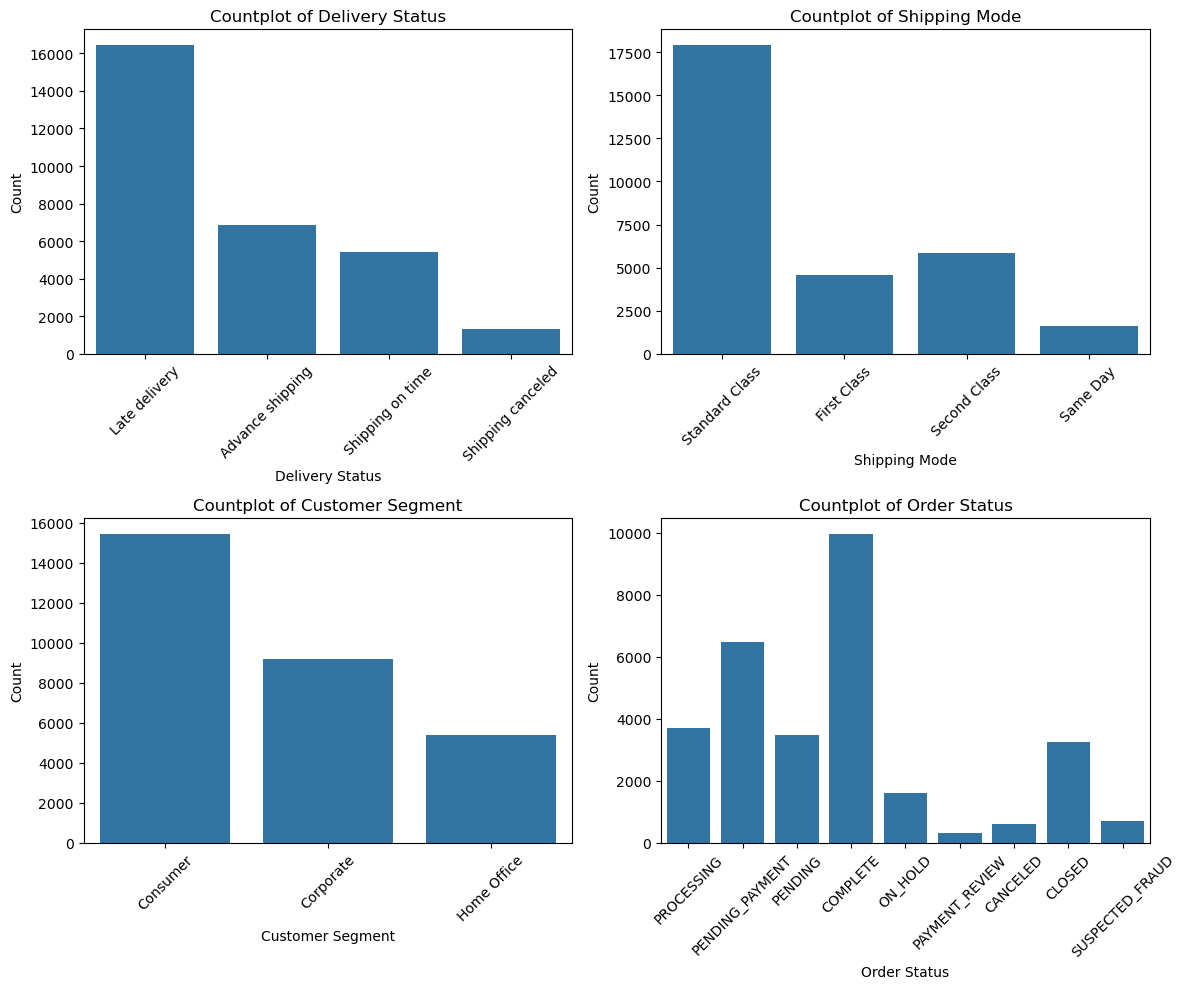

In [3]:
# Define the category columns to plot
columns_to_plot = ['Delivery Status', 'Shipping Mode', 'Customer Segment', 'Order Status']

# Set up the figure and axes for the grid of plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Create a countplot for each column
for i, column in enumerate(columns_to_plot):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f"Countplot of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

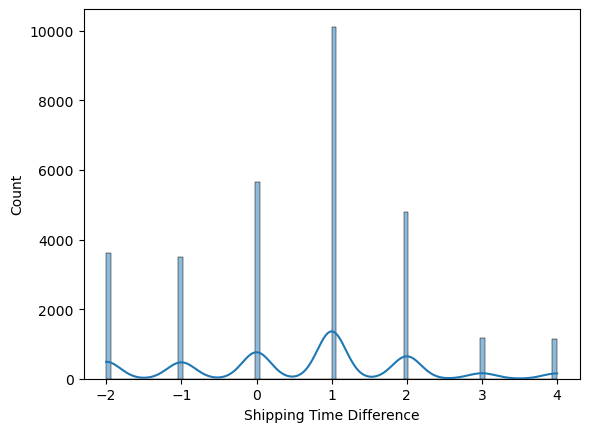

In [4]:
# Define the number columns to plot
df['Shipping Time Difference'] = df['Days for shipping (real)'] - df['Days for shipment (scheduled)']

sns.histplot(df['Shipping Time Difference'], kde=True)
plt.show()

* Distribution: The data is clustered around zero, indicating that the actual shipping time is often close to the scheduled shipping time.
* Density Curve: The KDE (Kernel Density Estimate) curve overlays the histogram, providing a smoother visualization of the distribution.
* X-axis: The x-axis represents the "Shipping Time Difference" values, ranging from approximately -2 to 4.

## Data Cleaning

In [5]:
## Drop Columns with null values
df = df.drop(['Customer Zipcode', 'Order Zipcode', 'Product Description'], axis=1)
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Shipping Time Difference
80120,TRANSFER,5,4,11.090000,175.990005,Late delivery,1,48,Water Sports,Caguas,...,PROCESSING,1073,48,http://images.acmesports.sports/Pelican+Sunstr...,Pelican Sunstream 100 Kayak,199.990005,0,4/6/2016 21:05,Standard Class,1
19670,PAYMENT,2,1,9.800000,245.000000,Late delivery,1,24,Women's Apparel,Florissant,...,PENDING_PAYMENT,502,24,http://images.acmesports.sports/Nike+Men%27s+D...,Nike Men's Dri-FIT Victory Golf Polo,50.000000,0,6/11/2017 18:43,First Class,1
114887,TRANSFER,2,4,117.550003,244.899994,Advance shipping,0,46,Indoor/Outdoor Games,Carmichael,...,PROCESSING,1014,46,http://images.acmesports.sports/O%27Brien+Men%...,O'Brien Men's Neoprene Life Vest,49.980000,0,1/4/2015 14:32,Standard Class,-2
120110,TRANSFER,5,4,118.430000,251.979996,Late delivery,1,43,Camping & Hiking,Troy,...,PENDING,957,43,http://images.acmesports.sports/Diamondback+Wo...,Diamondback Women's Serene Classic Comfort Bi,299.980011,0,1/15/2017 1:46,Standard Class,1
56658,DEBIT,2,4,-21.590000,107.970001,Advance shipping,0,29,Shop By Sport,Caguas,...,COMPLETE,627,29,http://images.acmesports.sports/Under+Armour+G...,Under Armour Girls' Toddler Spine Surge Runni,39.990002,0,4/8/2017 7:15,Standard Class,-2


In [6]:
## Drop unused variables
unused_features = ['Category Id', 'Customer Id', 'Department Id', 'Customer Id', 'Order Id',
                   'Order Item Cardprod Id', 'Order Item Id', 'Product Card Id', 'Product Category Id',
                   'Product Status', 'Latitude', 'Longitude', 'Order Customer Id',
                   'Customer City', 'Customer Country', 'Customer Email', 
                   'Customer Fname', 'Customer Lname', 'Customer Password', 'Customer State',
                   'Customer Street', 'Department Name', 'Market', 'Order City', 'Order Region', 
                   'Order State', 'Product Image', 'Product Name']
 
df.drop(unused_features,axis = 1, inplace = True)
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer Segment,Order Country,...,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Status,Product Price,shipping date (DateOrders),Shipping Mode,Shipping Time Difference
80120,TRANSFER,5,4,11.090000,175.990005,Late delivery,1,Water Sports,Consumer,Estados Unidos,...,0.06,1,199.990005,175.990005,11.090000,PROCESSING,199.990005,4/6/2016 21:05,Standard Class,1
19670,PAYMENT,2,1,9.800000,245.000000,Late delivery,1,Women's Apparel,Consumer,Honduras,...,0.04,5,250.000000,245.000000,9.800000,PENDING_PAYMENT,50.000000,6/11/2017 18:43,First Class,1
114887,TRANSFER,2,4,117.550003,244.899994,Advance shipping,0,Indoor/Outdoor Games,Corporate,México,...,0.48,5,249.899994,244.899994,117.550003,PROCESSING,49.980000,1/4/2015 14:32,Standard Class,-2
120110,TRANSFER,5,4,118.430000,251.979996,Late delivery,1,Camping & Hiking,Consumer,SudAfrica,...,0.47,1,299.980011,251.979996,118.430000,PENDING,299.980011,1/15/2017 1:46,Standard Class,1
56658,DEBIT,2,4,-21.590000,107.970001,Advance shipping,0,Shop By Sport,Consumer,República Dominicana,...,-0.20,3,119.970001,107.970001,-21.590000,COMPLETE,39.990002,4/8/2017 7:15,Standard Class,-2


In [7]:
## Converting temporal data into qualitative data
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])
df['shipping_date']=pd.to_datetime(df['shipping date (DateOrders)'])

## Create variables order day_of_week and shipping day_of_week
df['order_day_of_week'] = df['order_date'].dt.dayofweek
df['shipping_day_of_week']= df['shipping_date'].dt.dayofweek

## Drop unnecessary data columns
df = df.drop(columns=['Days for shipping (real)', 'Days for shipment (scheduled)', 
                      'order date (DateOrders)', 'shipping date (DateOrders)', 'order_date', 'shipping_date']) 
df.head()

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer Segment,Order Country,Order Item Discount,Order Item Discount Rate,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Status,Product Price,Shipping Mode,Shipping Time Difference,order_day_of_week,shipping_day_of_week
80120,TRANSFER,11.090000,175.990005,Late delivery,1,Water Sports,Consumer,Estados Unidos,24.0,0.12,...,1,199.990005,175.990005,11.090000,PROCESSING,199.990005,Standard Class,1,4,2
19670,PAYMENT,9.800000,245.000000,Late delivery,1,Women's Apparel,Consumer,Honduras,5.0,0.02,...,5,250.000000,245.000000,9.800000,PENDING_PAYMENT,50.000000,First Class,1,4,6
114887,TRANSFER,117.550003,244.899994,Advance shipping,0,Indoor/Outdoor Games,Corporate,México,5.0,0.02,...,5,249.899994,244.899994,117.550003,PROCESSING,49.980000,Standard Class,-2,4,6
120110,TRANSFER,118.430000,251.979996,Late delivery,1,Camping & Hiking,Consumer,SudAfrica,48.0,0.16,...,1,299.980011,251.979996,118.430000,PENDING,299.980011,Standard Class,1,1,6
56658,DEBIT,-21.590000,107.970001,Advance shipping,0,Shop By Sport,Consumer,República Dominicana,12.0,0.10,...,3,119.970001,107.970001,-21.590000,COMPLETE,39.990002,Standard Class,-2,3,5


In [8]:
## Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_columns = ['Type', 'Delivery Status', 'Category Name', 'Customer Segment', 
                       'Order Country', 'Order Status', 'Shipping Mode']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    
df.head()

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer Segment,Order Country,Order Item Discount,Order Item Discount Rate,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Status,Product Price,Shipping Mode,Shipping Time Difference,order_day_of_week,shipping_day_of_week
80120,3,11.090000,175.990005,1,1,46,0,45,24.0,0.12,...,1,199.990005,175.990005,11.090000,7,199.990005,3,1,4,2
19670,2,9.800000,245.000000,1,1,47,0,63,5.0,0.02,...,5,250.000000,245.000000,9.800000,6,50.000000,0,1,4,6
114887,3,117.550003,244.899994,0,0,30,1,99,5.0,0.02,...,5,249.899994,244.899994,117.550003,7,49.980000,3,-2,4,6
120110,3,118.430000,251.979996,1,1,9,0,134,48.0,0.16,...,1,299.980011,251.979996,118.430000,5,299.980011,3,1,1,6
56658,1,-21.590000,107.970001,0,0,38,0,121,12.0,0.10,...,3,119.970001,107.970001,-21.590000,2,39.990002,3,-2,3,5


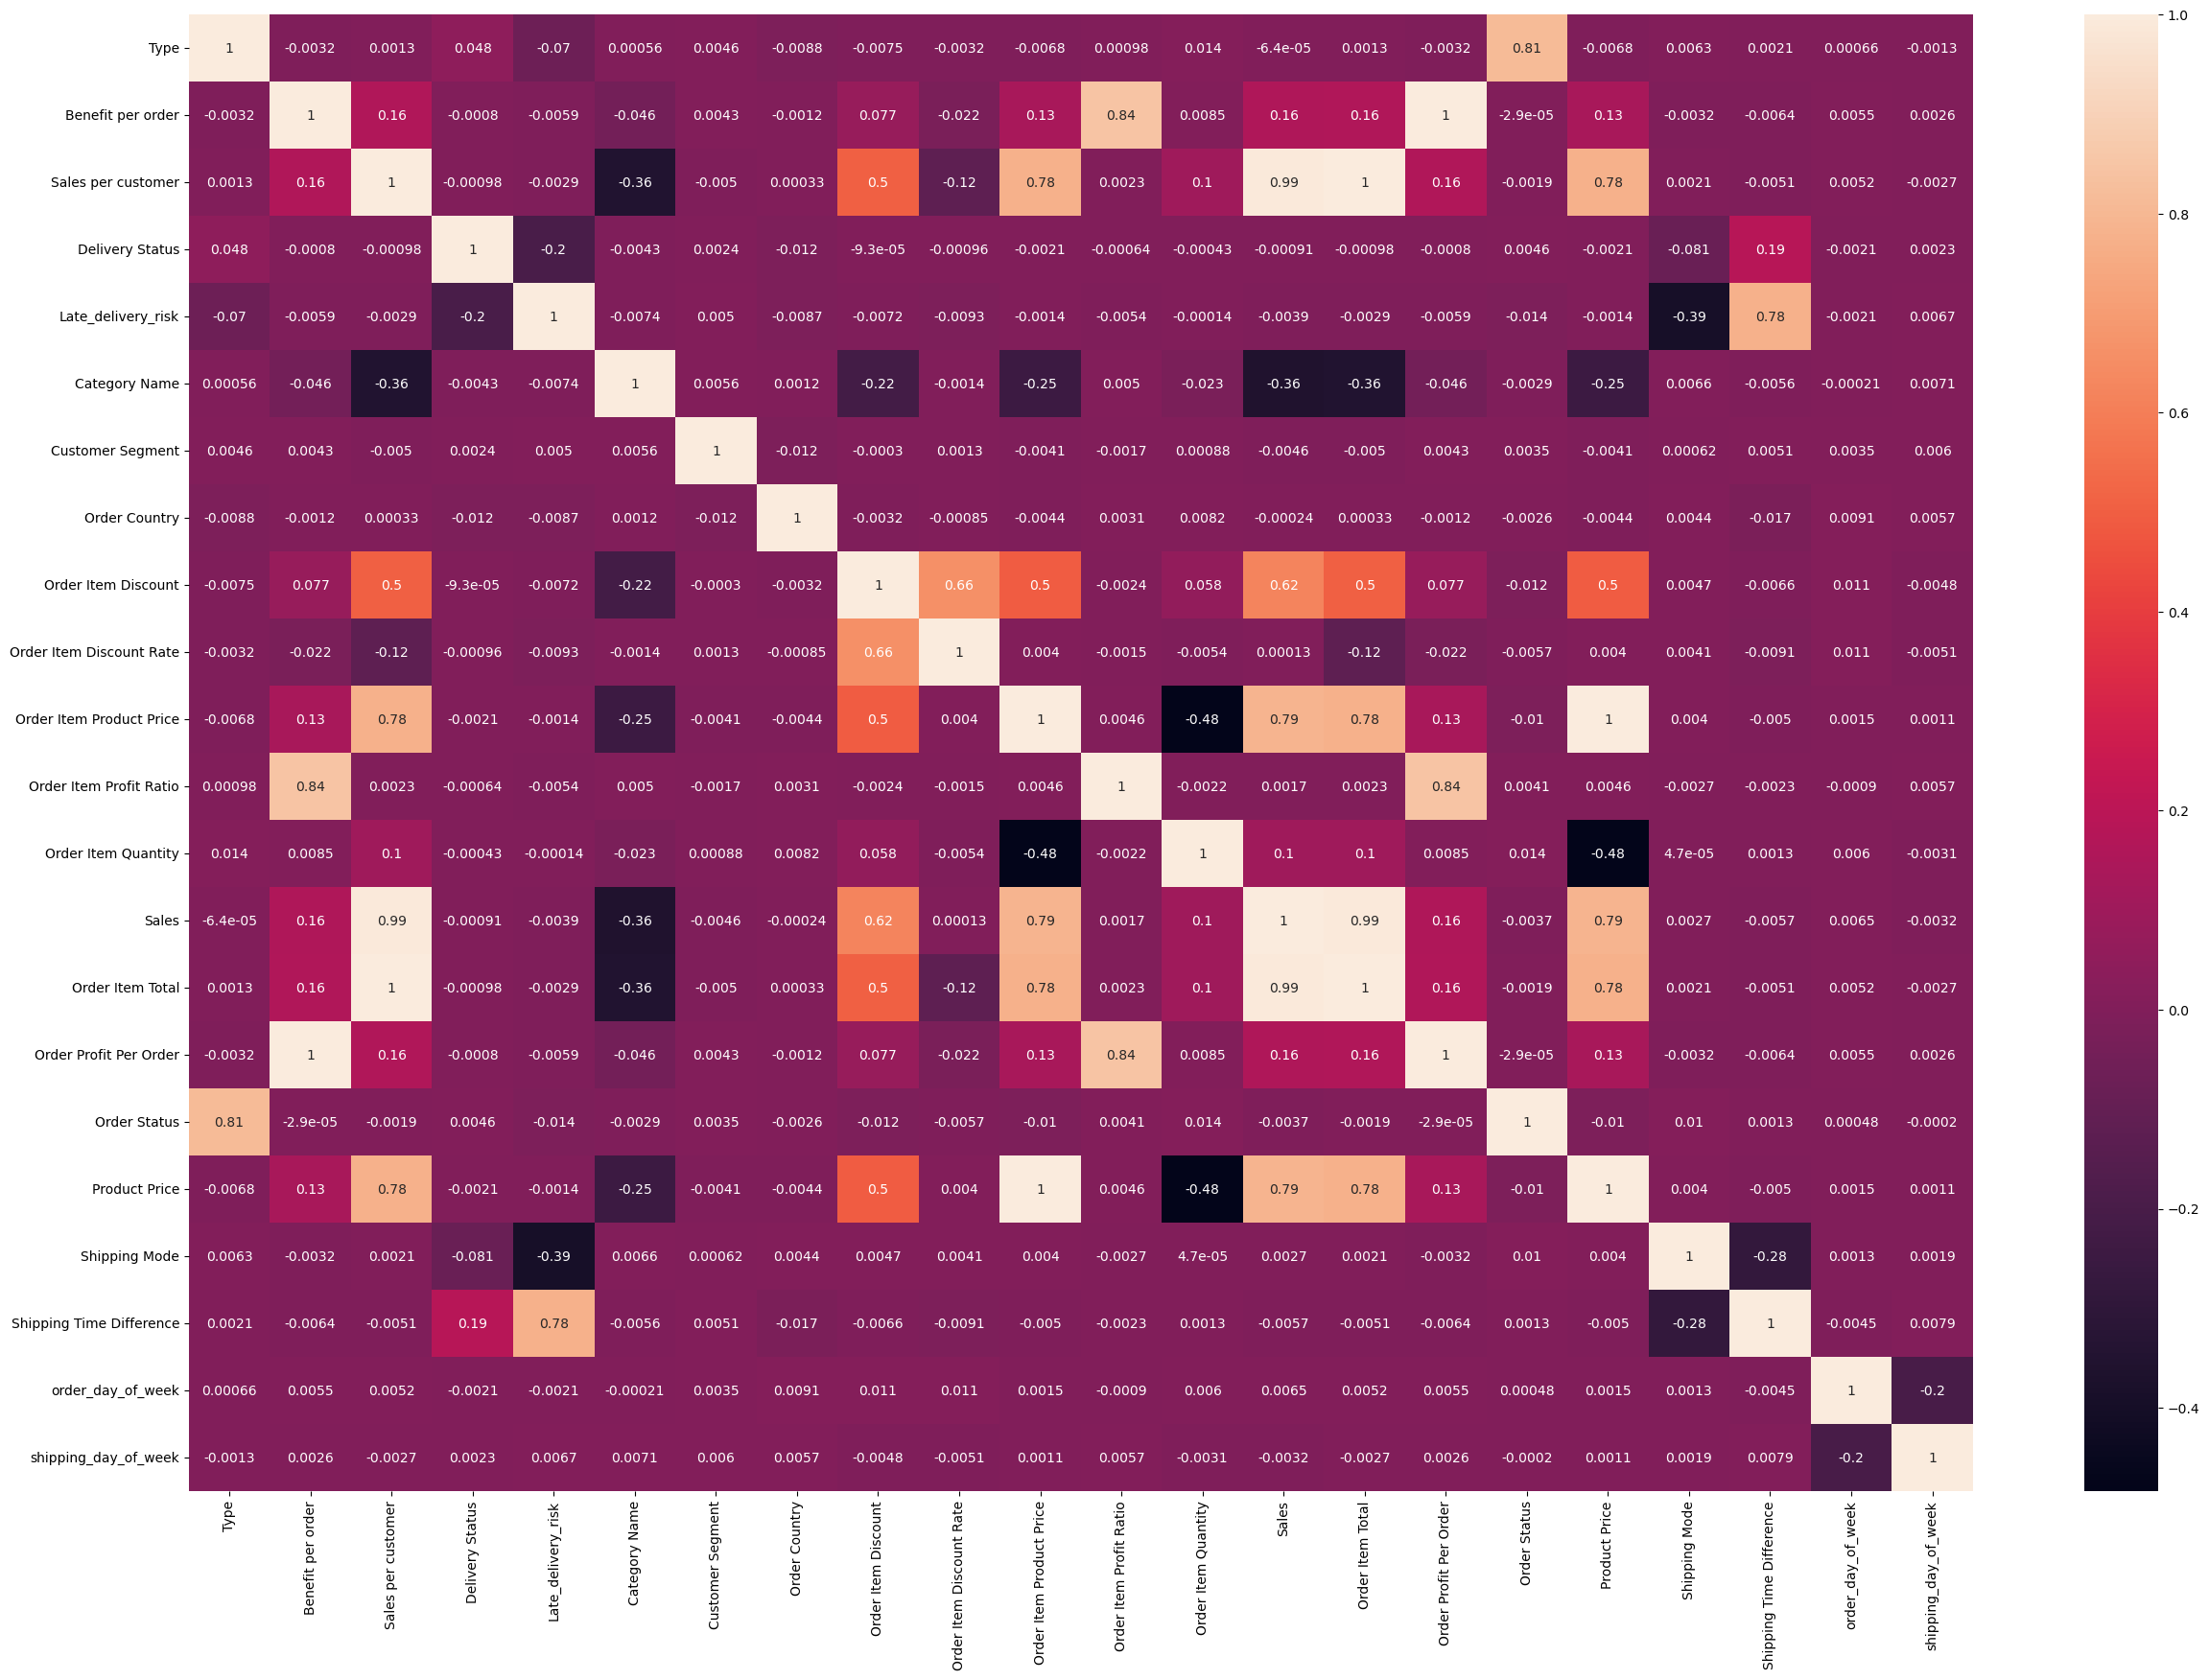

In [9]:
corrmap = df.corr()
top=corrmap.index
plt.figure(figsize=(30,20))
g=sns.heatmap(df[top].corr(),annot=True)

In [10]:
''' Delete the following variables:
- "Sales per customer" because this variable is highly correlated with the variable "Sales"
- "Order Item Discount" because this variable is highly correlated with the variable "Order Item Discount Rate"
- "Order Profit Per Order" because this variable is highly correlated with the variable "Benefit per order"
- Delete "Delivery Status", "Shipping Time Difference", "Customer Segment", "Order Status" to avoid data bias
'''

df = df.drop(columns=["Sales per customer", "Order Item Discount", 
                      "Order Item Discount", "Order Profit Per Order",
                      "Delivery Status", "Shipping Time Difference", "Customer Segment", "Order Status"])



df.head()

,Type,Benefit per order,Late_delivery_risk,Category Name,Order Country,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Product Price,Shipping Mode,order_day_of_week,shipping_day_of_week
80120,3,11.090000,1,46,45,0.12,199.990005,0.06,1,199.990005,175.990005,199.990005,3,4,2
19670,2,9.800000,1,47,63,0.02,50.000000,0.04,5,250.000000,245.000000,50.000000,0,4,6
114887,3,117.550003,0,30,99,0.02,49.980000,0.48,5,249.899994,244.899994,49.980000,3,4,6
120110,3,118.430000,1,9,134,0.16,299.980011,0.47,1,299.980011,251.979996,299.980011,3,1,6
56658,1,-21.590000,0,38,121,0.10,39.990002,-0.20,3,119.970001,107.970001,39.990002,3,3,5


## Split Data

Function "split_data" includes three steps:  
  * Split the cleaned data into X_data (features) and y_data (label)  
  * Split data into 3 subsets: train, validation, and test.    
  * Reset indexes of instances for X_data and y_data in each subset.    

In [11]:
## Define X, y data
X, y = df.drop(columns=['Late_delivery_risk']), df['Late_delivery_risk']
X.head()

,Type,Benefit per order,Category Name,Order Country,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Product Price,Shipping Mode,order_day_of_week,shipping_day_of_week
80120,3,11.090000,46,45,0.12,199.990005,0.06,1,199.990005,175.990005,199.990005,3,4,2
19670,2,9.800000,47,63,0.02,50.000000,0.04,5,250.000000,245.000000,50.000000,0,4,6
114887,3,117.550003,30,99,0.02,49.980000,0.48,5,249.899994,244.899994,49.980000,3,4,6
120110,3,118.430000,9,134,0.16,299.980011,0.47,1,299.980011,251.979996,299.980011,3,1,6
56658,1,-21.590000,38,121,0.10,39.990002,-0.20,3,119.970001,107.970001,39.990002,3,3,5


In [12]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)


********** Data Shape after Splitting **********


X_train:  (24000, 14)

X_val:  (3000, 14)

X_test:  (3000, 14)

********** Data View after Splitting **********


X_train:
    Type  Benefit per order  Category Name  Order Country  \
0     1           6.980000             21             10   
1     3          63.330002             12             45   
2     1          12.180000             30              8   

   Order Item Discount Rate  Order Item Product Price  \
0                      0.07                 25.000000   
1                      0.09                 59.990002   
2                      0.13                 49.980000   

   Order Item Profit Ratio  Order Item Quantity       Sales  Order Item Total  \
0                     0.08                    4  100.000000         93.000000   
1                     0.29                    4  239.960007        218.360001   
2                     0.28                    1   49.980000         43.480000   

   Product Price  Shipping Mo

## Model Fitting

In "fit_model" that conducts model fitting on input data.  
* This function includes three parameters: X, y, modelname.
* modelname options:  
  - Decision Tree
  - Logistic Regression  
  - Support Vector Machines  
  - Random Forest    

In [13]:
print("\n********** Fitting Decision Tree Model **********")
model_dt = fit_model(X_train, y_train, 'DT')
print("\n********** Fitting Logisitic regression Model **********")
model_lr = fit_model(X_train, y_train, 'LR')
print("\n********** Fitting Support Vector Machines Model **********")
model_svm = fit_model(X_train, y_train, 'SVM')
print("\n********** Fitting Random Forest Model **********")
model_rf = fit_model(X_train, y_train, 'RF')


********** Fitting Decision Tree Model **********
DT model has been fitted successfully.

********** Fitting Logisitic regression Model **********


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR model has been fitted successfully.

********** Fitting Support Vector Machines Model **********
SVM model has been fitted successfully.

********** Fitting Random Forest Model **********
RF model has been fitted successfully.


## Performance Evaluation

Function 'evaluate_model' produces confusion matrix.  
* This function requires two parameters (y_true, y_pred) that take predicted labels and actual labels.


********** Evaluating Model on Validation Data **********

Validation Accuracy: 0.8567

********** Evaluating Model on Test Data **********


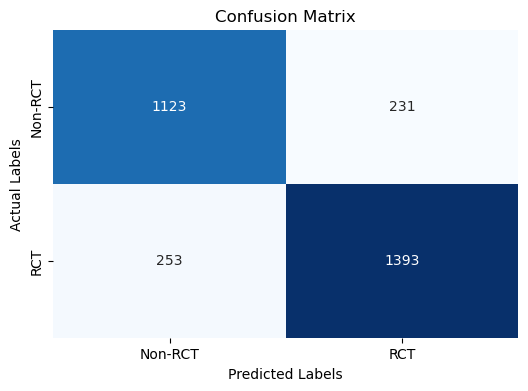


Confusion Matrix:
[[1123  231]
 [ 253 1393]]
                     Feature  Importance
13      shipping_day_of_week    0.297978
12         order_day_of_week    0.248823
11             Shipping Mode    0.200380
1          Benefit per order    0.059212
3              Order Country    0.037855
9           Order Item Total    0.035075
6    Order Item Profit Ratio    0.033712
4   Order Item Discount Rate    0.028245
0                       Type    0.015111
2              Category Name    0.013478
8                      Sales    0.009379
10             Product Price    0.008056
5   Order Item Product Price    0.007630
7        Order Item Quantity    0.005068


In [14]:
## Decision Tree Evaluation
print("\n********** Evaluating Model on Validation Data **********")
y_val_pred = model_dt.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nValidation Accuracy: {accuracy:.4f}")

# Evaluate the model on test data
print("\n********** Evaluating Model on Test Data **********")
y_test_pred = model_dt.predict(X_test)
evaluate_model(y_test, y_test_pred)

importances = model_dt.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


********** Evaluating Model on Validation Data **********

Validation Accuracy: 0.6843

********** Evaluating Model on Test Data **********


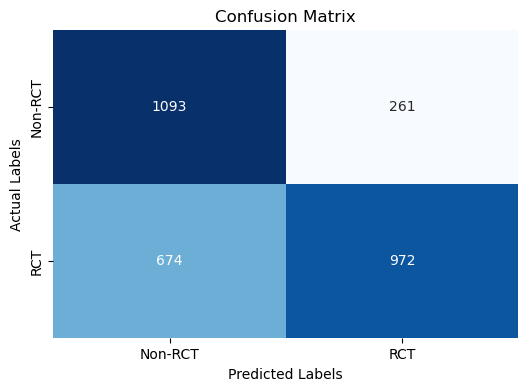


Confusion Matrix:
[[1093  261]
 [ 674  972]]
                     Feature  Coefficient  Abs_Coefficient
11             Shipping Mode    -0.948937         0.948937
4   Order Item Discount Rate     0.240883         0.240883
0                       Type    -0.168801         0.168801
7        Order Item Quantity     0.065100         0.065100
12         order_day_of_week    -0.010696         0.010696
13      shipping_day_of_week     0.008728         0.008728
6    Order Item Profit Ratio    -0.004390         0.004390
8                      Sales    -0.002990         0.002990
9           Order Item Total     0.002078         0.002078
2              Category Name    -0.001194         0.001194
5   Order Item Product Price     0.000572         0.000572
10             Product Price     0.000572         0.000572
3              Order Country    -0.000379         0.000379
1          Benefit per order    -0.000278         0.000278


In [15]:
## Logisitic regression Evaluation
print("\n********** Evaluating Model on Validation Data **********")
y_val_pred = model_lr.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nValidation Accuracy: {accuracy:.4f}")

# Evaluate the model on test data
print("\n********** Evaluating Model on Test Data **********")
y_test_pred = model_lr.predict(X_test)
evaluate_model(y_test, y_test_pred)

coefficients = model_lr.coef_[0]  # Use [0] for binary classification

# Map coefficients to feature names
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Add absolute values for sorting
importance_df['Abs_Coefficient'] = importance_df['Coefficient'].abs()

# Sort by absolute coefficient value
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display top features
print(importance_df)


********** Evaluating Model on Validation Data **********

Validation Accuracy: 0.5483

********** Evaluating Model on Test Data **********


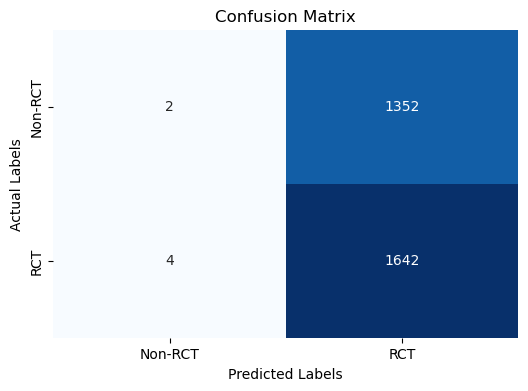


Confusion Matrix:
[[   2 1352]
 [   4 1642]]


In [16]:
## SVM Evaluation
print("\n********** Evaluating Model on Validation Data **********")
y_val_pred = model_svm.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nValidation Accuracy: {accuracy:.4f}")

# Evaluate the model on test data
print("\n********** Evaluating Model on Test Data **********")
y_test_pred = model_svm.predict(X_test)
evaluate_model(y_test, y_test_pred)


********** Evaluating Model on Validation Data **********

Validation Accuracy: 0.9040

********** Evaluating Model on Test Data **********


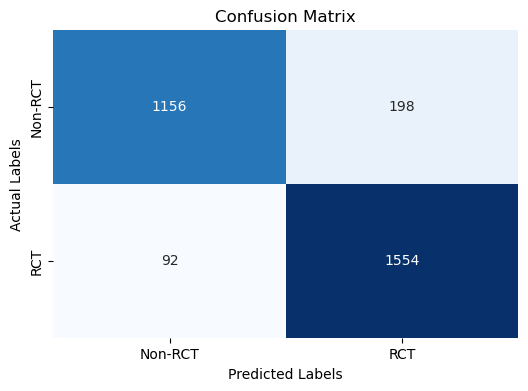


Confusion Matrix:
[[1156  198]
 [  92 1554]]
                     Feature  Importance
13      shipping_day_of_week    0.297978
12         order_day_of_week    0.248823
11             Shipping Mode    0.200380
1          Benefit per order    0.059212
3              Order Country    0.037855
9           Order Item Total    0.035075
6    Order Item Profit Ratio    0.033712
4   Order Item Discount Rate    0.028245
0                       Type    0.015111
2              Category Name    0.013478
8                      Sales    0.009379
10             Product Price    0.008056
5   Order Item Product Price    0.007630
7        Order Item Quantity    0.005068


In [17]:
## Random Forest Evaluation
print("\n********** Evaluating Model on Validation Data **********")
y_val_pred = model_rf.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nValidation Accuracy: {accuracy:.4f}")

# Evaluate the model on test data
print("\n********** Evaluating Model on Test Data **********")
y_test_pred = model_rf.predict(X_test)
evaluate_model(y_test, y_test_pred)

importances = model_dt.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)